# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd London Sounds dataset, build a machine learning pipeline that takes as an input an audio segment and predicts whether the audio segment has been recorded indoors or outdoors.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd London Sounds dataset. 

Your submission will consist of two Jupyter notebooks, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks might not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Karan Kaus
**Student ID**:  



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. 

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import math

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [3]:
# !pip3 install seaborn
# !pip3 install tensorflow
import seaborn as sns
import soundfile as sf
import os, random, librosa
from tqdm.auto import tqdm
from IPython import display
import tensorflow as tf
from tensorflow.keras import layers, models, utils, callbacks
from keras.preprocessing.image import ImageDataGenerator
sns.set_style('darkgrid')

2022-12-09 11:42:43.160305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 11:42:43.422487: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 11:42:43.422502: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 11:42:43.941869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [4]:
sample_path = 'MLEndLS/*.wav'
files = glob.glob(sample_path)
MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 

In [6]:
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['in_out', 'area']),
    remainder='passthrough',
    verbose_feature_names_out=False
)

input_data = column_transformer.fit_transform(MLENDLS_df)
input_data = pd.DataFrame(data=input_data, columns=column_transformer.get_feature_names_out())

labels = MLENDLS_df['spot'].to_numpy()

input_data = input_data.drop(columns=[
    'Participant',
    'spot',
])

display(input_data)
display(labels)

TypeError: 'module' object is not callable

In [22]:
class config:
    class_names = np.array(MLENDLS_df['in_out'].unique())
    MAX_EPOCHS = 500
    

In [14]:
def get_mel_spectrogram(sound_wave, sr, spec_h=128, spec_w=128, length=1):
    n_mels = spec_h
    hop = int(sr * length / (spec_w - 1)) 
    mel_spect = librosa.feature.melspectrogram(y=sound_wave, sr=sr, hop_length=hop, n_mels=n_mels)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

audio_samples = []
class_distribution = []
spectrogram_samples = []

if not os.path.exists(DATA):
    os.mkdir(DATA)

for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    
    meta_info = MLENDLS_df.loc[fileID]
    
    dst_dir = os.path.join(DATA, meta_info['in_out'])
    
    if not os.path.exists(dst_dir):
        os.mkdir(dst_dir)    

    waveform, sr = librosa.load(file)
    waveform = waveform[:int(143766/2)]
    
    if len(waveform) < int(143766/2): continue

    class_distribution.append(meta_info['in_out'])
    dst_path = f"{os.path.join(dst_dir, file_name)}.png"
    
    plt.imsave(dst_path, get_mel_spectrogram(waveform, sr), cmap='gray')

    spectrogram_samples.append(dst_path)
    audio_samples.append(file_name)

print('done')

  0%|          | 0/2500 [00:00<?, ?it/s]

done


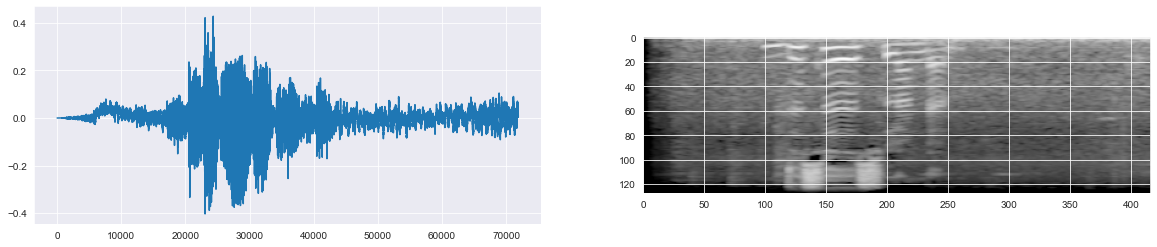

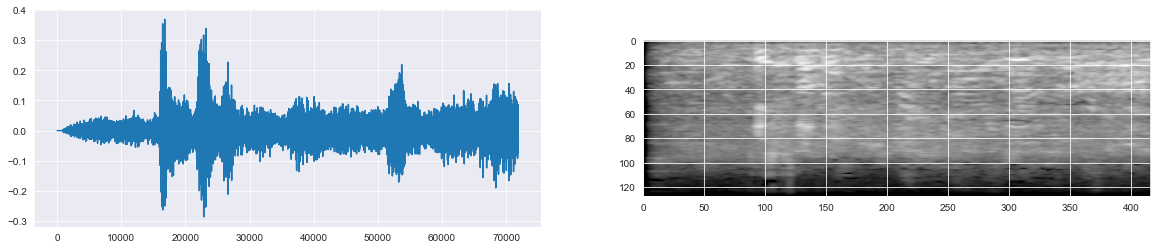

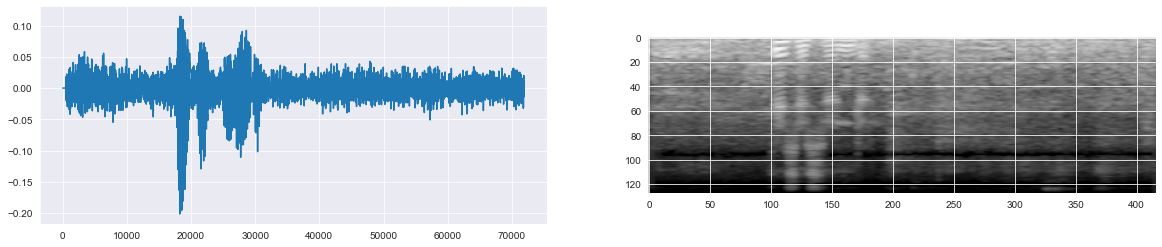

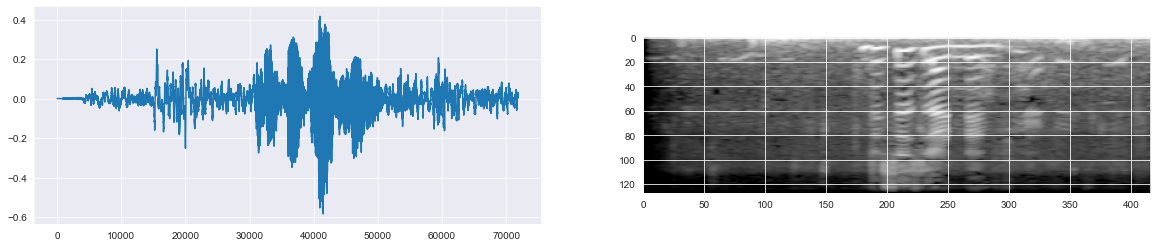

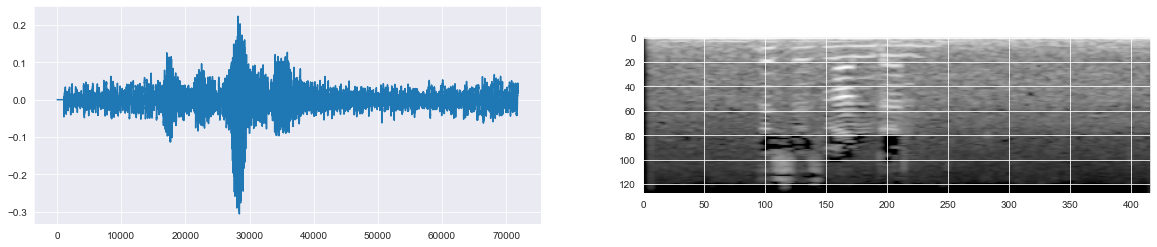

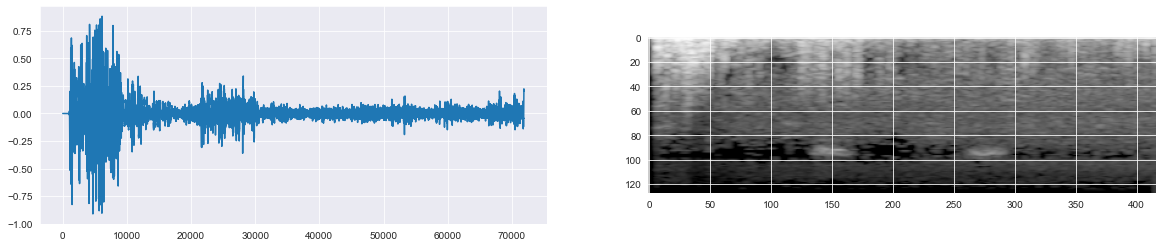

In [24]:
for i in range(6):
    waveform, sr = librosa.load(files[i])
    waveform = waveform[:int(143766/2)]
    fig, ax = plt.subplots(1,2, figsize=(20, 4))
    ax[0].plot(waveform)
    ax[1].imshow(plt.imread(spectrogram_samples[i]), cmap='gray')
#     fig.suptitle(config.CLASSES[i], fontsize=15);

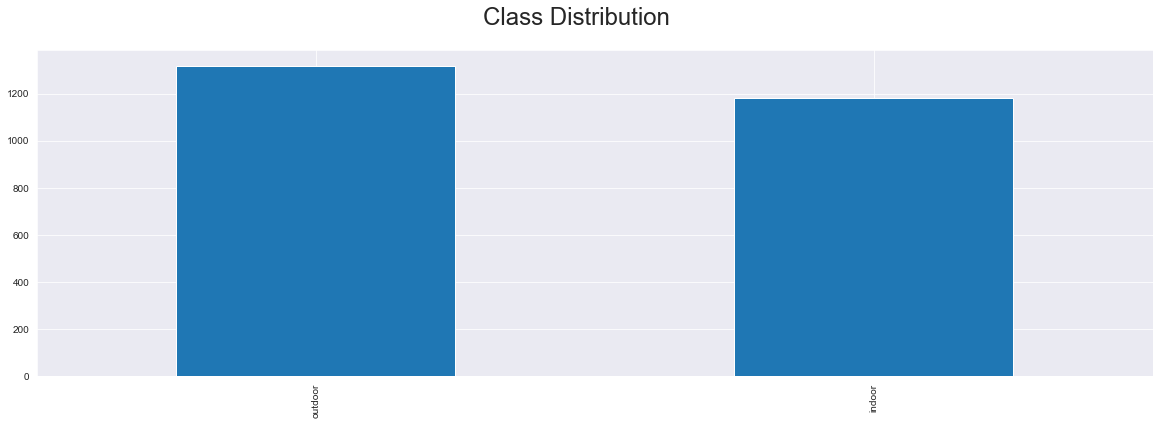

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.Series(class_distribution).value_counts().plot.bar()
fig.suptitle('Class Distribution', fontsize=24);

In [26]:
image_size = (128, 416, 1)
datagen = ImageDataGenerator(validation_split=0.1)

training_set = datagen.flow_from_directory(
    DATA, target_size=image_size[:2],  batch_size=32, class_mode='categorical', color_mode='grayscale', subset='training'
)
validation_set = datagen.flow_from_directory(
    DATA, target_size=image_size[:2],  batch_size=32, class_mode='categorical', color_mode='grayscale', subset='validation'
)

Found 2250 images belonging to 2 classes.
Found 249 images belonging to 2 classes.


In [27]:
model = models.Sequential([
    layers.Conv2D(32, 3, input_shape=image_size, activation='relu', padding='same'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, padding='same', activation='relu',),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(padding='same'),
    layers.Dropout(0.25),
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(config.class_names), activation='softmax'),
])

model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 416, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 416, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 208, 32)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 64, 208, 32)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 208, 64)       18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 208, 64)       36928     
                                                      

In [28]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

rlp = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-10, mode='min', verbose=1)

history = model.fit(
    training_set, validation_data=validation_set,
    epochs=config.MAX_EPOCHS, callbacks=[es, rlp], batch_size=8
)

Epoch 1/500
71/71 [==============================] - 177s 2s/step - loss: 1.3294 - accuracy: 0.5218 - val_loss: 0.6913 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 2/500
71/71 [==============================] - 174s 2s/step - loss: 0.6876 - accuracy: 0.5404 - val_loss: 0.6902 - val_accuracy: 0.5261 - lr: 0.0010
Epoch 3/500
71/71 [==============================] - 174s 2s/step - loss: 0.6768 - accuracy: 0.5844 - val_loss: 0.6640 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 4/500
71/71 [==============================] - 175s 2s/step - loss: 0.6595 - accuracy: 0.6133 - val_loss: 0.6582 - val_accuracy: 0.5542 - lr: 0.0010
Epoch 5/500
71/71 [==============================] - 176s 2s/step - loss: 0.6429 - accuracy: 0.6253 - val_loss: 0.6345 - val_accuracy: 0.6546 - lr: 0.0010
Epoch 6/500
71/71 [==============================] - 176s 2s/step - loss: 0.6239 - accuracy: 0.6480 - val_loss: 0.6672 - val_accuracy: 0.5823 - lr: 0.0010
Epoch 7/500
71/71 [==============================] - 167s 2s/step - lo

# 8 Results

Carry out your experiments here, explain your results.

  
  
--------------------------------------
--------------------------------------
--------------------------------------
  
  
  

# 9 Conclusions

Your conclusions, improvements, etc should go here